###  선형회귀  
간단산 선형회귀를 실습해보아요  
이 실습을 통해 무엇을 얻는다. 
목적이 뭔가?   아 이걸 이렇게 사용하는 군요. 별거 아닌네요  

## 미션이 뭔가요?

## data 
# 아이스크림 판매량과 온도를 저장하고 있다.

In [ ]:
# import numpy as np


In [2]:
# import pandas as pd

In [3]:
# pd.read_excel?

In [4]:
import pandas as pd
df = pd.read_excel('icecream_sale.xlsx', sheet_name=0)
df.head()
#df['판매량'] = round(df['판매량'], 1)

,순번,온도,판매량
0,1,20.0,183.600000
1,2,21.0,185.436000
2,3,22.0,187.290360
3,4,23.0,189.163264
4,5,24.0,191.054896


### pd.read_excel 대해 잠시 알아보고 오시죠   
df = dataframe 에 대해 잠시 알아보고 오시죠   
@@@

In [5]:
#df.to_excel('icecream_sale2.xlsx')

### 필요한 칼럼만 담기
순번은 필요 없어서 

In [6]:
df.head()

,순번,온도,판매량
0,1,20.0,183.600000
1,2,21.0,185.436000
2,3,22.0,187.290360
3,4,23.0,189.163264
4,5,24.0,191.054896


In [7]:
df.columns

Index(['순번', '온도', '판매량'], dtype='object')

In [8]:
columns = ['온도', '판매량']
df = df[columns]
df.head()

,온도,판매량
0,20.0,183.600000
1,21.0,185.436000
2,22.0,187.290360
3,23.0,189.163264
4,24.0,191.054896


In [9]:
df.describe()

,온도,판매량
count,88.000000,88.000000
mean,26.440909,335.587163
std,3.957668,166.896968
min,20.000000,183.600000
25%,23.000000,189.163264
50%,26.150000,274.431000
75%,29.700000,434.622406
max,33.300000,729.251374


In [10]:
tt = df.온도.value_counts().sort_values(ascending=False)
tt[::5]

20.0    6
25.0    6
28.0    2
33.0    2
26.3    2
32.3    2
30.3    2
Name: 온도, dtype: int64

In [11]:
tt = df.판매량.value_counts().sort_values(ascending=False)
# df.iloc[:,-1].value_counts()
print(type(tt))
print(tt[::5])
#tt[::5] # 판매량 카운트다. 이것이 무슨 의미가 있냐?
# 왜 이걸 체크했냐?

<class 'pandas.core.series.Series'>
191.054896    6
219.713131    6
480.263149    2
316.549350    2
420.156825    2
365.939152    2
318.793350    2
Name: 판매량, dtype: int64


In [12]:
pd.set_option('display.max_rows', 1000)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   온도      88 non-null     float64
 1   판매량     88 non-null     float64
dtypes: float64(2)
memory usage: 1.5 KB


In [14]:
import numpy as np
import pandas as pd

In [15]:
from sklearn import model_selection
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [16]:
dataset = df.values 

### 왜 values를 사용했나요? @@@

In [17]:
print('type of dataset: ',type(dataset))

type of dataset:  <class 'numpy.ndarray'>


### numpy.ndarray 에 대해 간단히 알아 보아요  
내 교재    
[numpy.ndarray basic](043_ndarray_basic.ipynb)  

[datacamp > numpy_cheat_sheet](https://www.datacamp.com/community/blog/python-numpy-cheat-sheet)  

[numpy_cheat_sheet](http://taewan.kim/post/numpy_cheat_sheet/)  

In [18]:
dataset.shape # 행, 열
#print(dataset.shape)

(88, 2)

In [19]:
dataset.ndim # dataframe 스타일이 2차원이다.

2

In [20]:
df.head()

,온도,판매량
0,20.0,183.600000
1,21.0,185.436000
2,22.0,187.290360
3,23.0,189.163264
4,24.0,191.054896


### ndarray에서 원하는 열 가져오기

In [21]:
# 독립변수 처리
# 독립변수는 최소 1개이상 이다. 그랫 항상 엑셀 테이블 형태(2차원)로 생겼다고 생각하는게 좋다.
# 어차피 현어에서는 독립변수가 1개인 경우는 거의 없다.

X = dataset[:,0:1] # 행, 열
print(X[:5])
print("")
print('shape:', X.shape)
print('차원:', X.ndim)

[[20.]
 [21.]
 [22.]
 [23.]
 [24.]]

shape: (88, 1)
차원: 2


In [22]:
y = dataset[:,1]
y
#df.iloc[:,-1].value_counts()

array([183.6       , 185.436     , 187.29036   , 189.1632636 ,
       191.05489624, 219.71313067, 237.66      , 273.309     ,
       314.30535   , 361.4511525 , 415.66882537, 478.01914918,
       549.72202156, 632.18032479, 727.00737351, 183.6       ,
       185.436     , 187.29036   , 189.1632636 , 191.05489624,
       219.71313067, 239.904     , 275.553     , 316.54935   ,
       363.6951525 , 417.91282537, 480.26314918, 551.96602156,
       634.42432479, 729.25137351, 183.6       , 185.436     ,
       187.29036   , 189.1632636 , 191.05489624, 219.71313067,
       242.148     , 277.797     , 318.79335   , 365.9391525 ,
       420.15682537, 482.50714918, 554.21002156, 636.66832479,
       183.6       , 185.436     , 187.29036   , 189.1632636 ,
       191.05489624, 219.71313067, 237.66      , 273.309     ,
       314.30535   , 361.4511525 , 415.66882537, 478.01914918,
       549.72202156, 632.18032479, 727.00737351, 183.6       ,
       185.436     , 187.29036   , 189.1632636 , 191.05

#### 주의사항   
X는 2차원 배열이고, y는 1차원이다.  
@@@ 설명이 필요   
2차원 배열이 뭐니?  

# @@@ train_test_split   
@@@ 이게 뭔 짓이니? 너 뭐하니?  
머신러닝을 데이터에서 패턴(함수관계)을 찾아낸다.   

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [24]:
print(X_train.shape)
print(y_train.shape)

(61, 1)
(61,)


In [25]:
print(X_test.shape)
print(y_test.shape)

(27, 1)
(27,)


In [26]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

### train data로 예측해보기
어떤 의미가 있는가?   
학습한 데이터로 평가해보자. 음...   
답을 다 가르쳐 졌으니???  

In [27]:
y_predict = model_lr.predict(X_train) 
r2 = metrics.r2_score(y_train, y_predict)
print(r2) #1.0

0.8745008252645944


In [43]:
# metrics.r2_score?  # R^2 (coefficient of determination) regression score function.

### r2 는 어떻게 해석하는 거니 ?
@@@

[결정계수(in wikipedia)](https://ko.wikipedia.org/wiki/%EA%B2%B0%EC%A0%95%EA%B3%84%EC%88%98)

결정계수(決定係數, 영어: coefficient of determination)는 추정한 선형 모형이 주어진 자료에 적합한 정도를 재는 척도이다.   
반응 변수의 변동량 중에서 적용한 모형으로 설명가능한 부분의 비율을 가리킨다. 

### 기울기, 절편
@@@ 이게 뭐니?

In [28]:
#기울기 coef_
model_lr.coef_

array([38.74606754])

In [29]:
# 절편
model_lr.intercept_

-680.7059161403363

In [30]:
df

,온도,판매량
0,20.0,183.600000
1,21.0,185.436000
2,22.0,187.290360
3,23.0,189.163264
4,24.0,191.054896
5,25.0,219.713131
6,25.3,237.660000
7,26.0,273.309000
8,27.0,314.305350
9,28.0,361.451152


### 내일 온도가 24.5도 일때 아이스크림 몇개가 팔릴것 같니?

In [41]:
# y=wx+b
temp= 24.5
38.74*temp - 680.70

268.42999999999995

### test

In [32]:
y_predict = model_lr.predict(X_test) 
score = metrics.r2_score(y_test, y_predict)
print(score) 

0.8632136135314854


In [33]:
import matplotlib.pyplot as plt

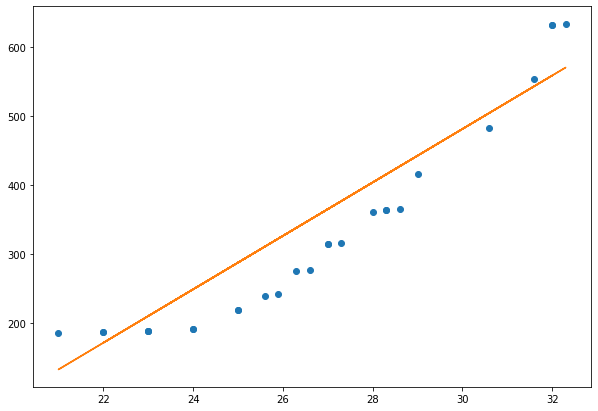

In [34]:
fig = plt.figure(figsize=(10,7))
plt.plot(X_test, y_test, 'o')
plt.plot(X_test, model_lr.predict(X_test))
plt.show()

## plot

In [35]:
import matplotlib.pyplot as plt

### 전체 데이터를 차트를 그려보자
왜? 어떻게 분포하고 있는지를 알고 싶으니

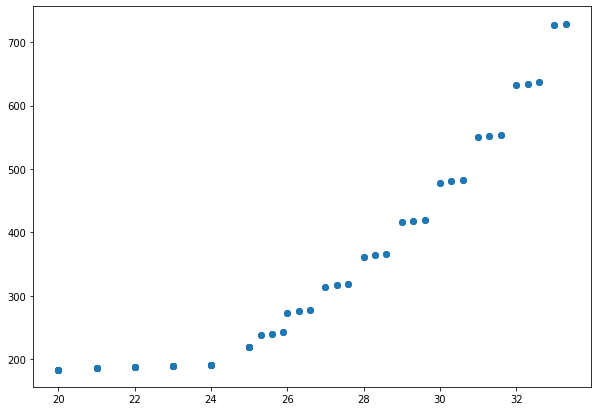

In [36]:
fig = plt.figure(figsize=(10, 7))
plt.plot(X, y, 'o')
plt.show()

In [37]:
pred = model_lr.predict(X)
pred

array([ 94.21543461, 132.96150214, 171.70756968, 210.45363722,
       249.19970475, 287.94577229, 299.56959255, 326.69183983,
       365.43790737, 404.1839749 , 442.93004244, 481.67610998,
       520.42217752, 559.16824505, 597.91431259,  94.21543461,
       132.96150214, 171.70756968, 210.45363722, 249.19970475,
       287.94577229, 311.19341281, 338.31566009, 377.06172763,
       415.80779517, 454.5538627 , 493.29993024, 532.04599778,
       570.79206531, 609.53813285,  94.21543461, 132.96150214,
       171.70756968, 210.45363722, 249.19970475, 287.94577229,
       322.81723308, 349.93948035, 388.68554789, 427.43161543,
       466.17768296, 504.9237505 , 543.66981804, 582.41588558,
        94.21543461, 132.96150214, 171.70756968, 210.45363722,
       249.19970475, 287.94577229, 299.56959255, 326.69183983,
       365.43790737, 404.1839749 , 442.93004244, 481.67610998,
       520.42217752, 559.16824505, 597.91431259,  94.21543461,
       132.96150214, 171.70756968, 210.45363722, 249.19

In [38]:
pred.shape

(88,)

In [39]:
X.shape

(88, 1)

http://hleecaster.com/ml-linear-regression-example/

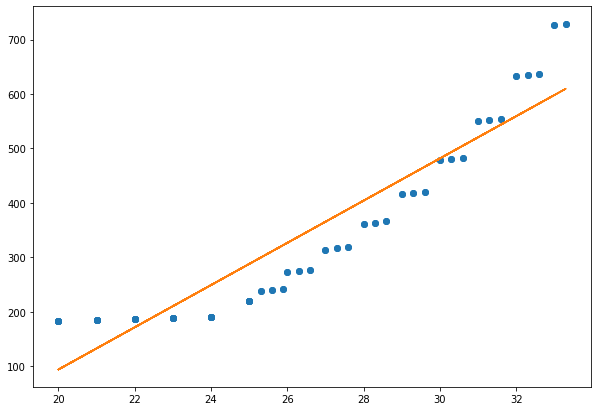

In [40]:
fig = plt.figure(figsize=(10,7))
plt.plot(X, y, 'o')
plt.plot(X, model_lr.predict(X))
plt.show()